<a href="https://colab.research.google.com/github/vidooshis/breast-cancer-classification/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
bc=sklearn.datasets.load_breast_cancer()

In [ ]:
df=pd.DataFrame(bc.data,columns=bc.feature_names)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['label']=bc.target

In [ ]:
df['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
x=df.drop(columns='label',axis=1)
y=df['label']

In [ ]:
#for prediction at the end
x_row=x.sample(n=1,random_state=45)
x_list=x_row.values.flatten().tolist()
print(x_list)
len(x_list)

y_row=y.sample(n=1,random_state=45)
y_list=y_row.values.flatten().tolist()
print(y_list)

[10.97, 17.2, 71.73, 371.5, 0.08915, 0.1113, 0.09457, 0.03613, 0.1489, 0.0664, 0.2574, 1.376, 2.806, 18.15, 0.008565, 0.04638, 0.0643, 0.01768, 0.01516, 0.004976, 12.36, 26.87, 90.14, 476.4, 0.1391, 0.4082, 0.4779, 0.1555, 0.254, 0.09532]
[1]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [ ]:
print(x_train_std,x_test_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]] [[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [ ]:
x_train.shape

(455, 30)

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
#setting up the layers of neural network
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),#input columns=30--input layer to make it 1-d array
                        keras.layers.Dense(20,activation='relu'),#neurons=20-- hidden layer
                        keras.layers.Dense(2,activation='sigmoid')#no. of neurons=no. of classes u have like 0/1
])


In [ ]:
#compiling nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',# when we are using 0,1,... we use sparase_categorical- int
              metrics=['accuracy'])

dog-0
cat-1
horse-2 #sparse_categorical_crossentropy

dog=[0 1 0]
cat=[1 0 0]
horse=[0 0 1]#encoding of labels --use categorical_crossentropy


In [ ]:
#training nn
history=model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7500 - loss: 0.5353 - val_accuracy: 0.8478 - val_loss: 0.4293
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8808 - loss: 0.3281 - val_accuracy: 0.9130 - val_loss: 0.2906
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9160 - loss: 0.2428 - val_accuracy: 0.9348 - val_loss: 0.2288
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9315 - loss: 0.2010 - val_accuracy: 0.9565 - val_loss: 0.1962
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9393 - loss: 0.1752 - val_accuracy: 0.9565 - val_loss: 0.1755
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.1569 - val_accuracy: 0.9565 - val_loss: 0.1603
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.1427 - val_accuracy: 0.9565 - val_loss: 0.1475
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9546 - loss: 0.1311 - val_accuracy: 0.9565 - val_loss

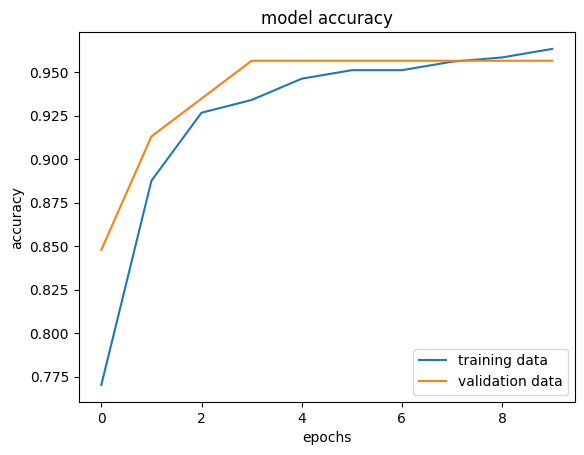

In [ ]:
#visualising accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data','validation data'],loc='lower right')

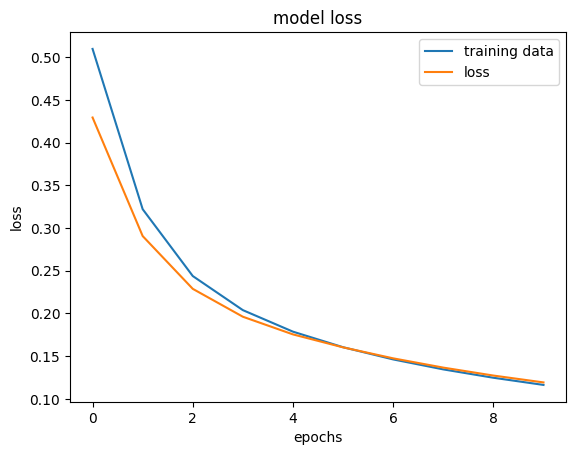

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training data','loss'],loc='upper right')

In [ ]:
#accuracy of model on testdata
loss,accuracy=model.evaluate(x_test_std,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9679 - loss: 0.1299 


In [ ]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
y_pred=model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.33832937 0.5997499 ]


In [ ]:
print(x_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [ ]:
print(y_pred)

[[0.33832937 0.5997499 ]
 [0.39663875 0.48279017]
 [0.02471563 0.87722033]
 [0.9994546  0.00585219]
 [0.39344886 0.45042744]
 [0.99419767 0.06082904]
 [0.17958619 0.6084391 ]
 [0.03126129 0.8651649 ]
 [0.12300812 0.7530721 ]
 [0.15381365 0.82406867]
 [0.5437856  0.5079874 ]
 [0.1061563  0.78420115]
 [0.17798439 0.7627278 ]
 [0.25879547 0.66895336]
 [0.05965905 0.76886547]
 [0.89925224 0.18952419]
 [0.05571302 0.8855635 ]
 [0.12157157 0.7889427 ]
 [0.07350338 0.69256437]
 [0.95748466 0.04747793]
 [0.15354869 0.98493797]
 [0.02412357 0.8326862 ]
 [0.07421304 0.7753498 ]
 [0.05416257 0.8521508 ]
 [0.21865493 0.6853665 ]
 [0.9590886  0.19866088]
 [0.11286996 0.73103   ]
 [0.18762092 0.58383137]
 [0.9111204  0.43208605]
 [0.9724924  0.26175407]
 [0.17991944 0.80402356]
 [0.15813507 0.7018116 ]
 [0.09598237 0.79478794]
 [0.99973667 0.07235867]
 [0.98973924 0.12414815]
 [0.14235401 0.7680732 ]
 [0.01752127 0.8693642 ]
 [0.19806644 0.6670286 ]
 [0.02188746 0.8392756 ]
 [0.10399039 0.8506234 ]


In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [ ]:
input_data=(10.97, 17.2, 71.73, 371.5, 0.08915, 0.1113, 0.09457, 0.03613, 0.1489, 0.0664, 0.2574, 1.376, 2.806, 18.15, 0.008565, 0.04638, 0.0643, 0.01768, 0.01516, 0.004976, 12.36, 26.87, 90.14, 476.4, 0.1391, 0.4082, 0.4779, 0.1555, 0.254, 0.09532)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
input_data_std=scaler.transform(input_data_reshaped)
predict=model.predict(input_data_std)
print(predict)

pred_label=[np.argmax(predict)]
print(pred_label)

if (pred_label[0]==0):
  print("breast cancer tumor is malignant")
elif (pred_label[0]==1):
  print("breast cancer tumor is benign")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.09994669 0.408334  ]]
[1]
breast cancer tumor is benign


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
